*This is a piece of code to convert our Excel spreadsheets into the 80 column MPC format required for find_orb.*

Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import functions

Object and observatory details

In [2]:
object = 'Astraea'
obs_code = 995

Reads Excel file into relevantly named txt file in correct find_orb format and returns the pandas dataframe produced in the process

In [4]:
df = functions.read_from_excel('Astraea', 995)

                        Date + Time  Exp time (s)            RA   RA (deg)  \
0           2024-01-06T19:45:30.787          15.0  06:13:11.477  93.297821   
1   2024-01-12T21:48:24.032                  15.0  06:07:40.298  91.917908   
2   2024-01-13T20:07:37.1525                  8.0  06:06:53.631  91.723463   
3          2024-01-14T21:24:41.2043           4.0  06:06:02.022  91.508425   
4          2024-01-15T19:10:29.4834           4.0  06:05:19.106  91.329608   
5               2024-01-17T18:36:07           4.0  06:03:49.760  90.957333   
6          2024-01-18T17:29:32.2997           4.0  06:03:08.965  90.787354   
7           2024-01-24T19:42:26.945           2.0  05:59:26.566  89.860692   
8          2024-01-26T17:56:01.5886           4.0  05:58:31.474  89.631142   
9                               NaN           NaN           NaN        NaN   
10                              NaN           NaN           NaN        NaN   
11                              NaN           NaN           NaN 

Plotting Dec vs RA for given object

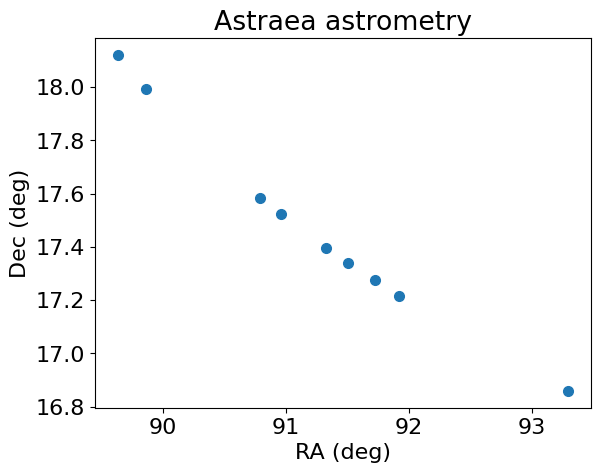

In [8]:
#setting some parameters for the plots.
plt.rcParams.update({'font.size': 16, 'lines.markersize': 7})

observatories = []
RA_err_deg = []
RA_deg = []
for i in range(0, len(df['RA'])):
    RA = str(df['RA'][i])
    RA_err = df['RA err (as)'][i]
    if RA != 'nan':
        RA_deg.append(functions.RA_to_deg(RA))
        RA_err_deg.append(float(RA_err)*15/3600)
        try:
            observatories.append(df['Observatory'][i])
        except:
            observatories.append(995)

Dec_err_deg = []
Dec_deg = []
for i in range(0, len(df['Dec'])):
    Dec = str(df['Dec'][i])
    Dec_err = df['Dec err (as)'][i]
    if Dec != 'nan':
        Dec_deg.append(functions.dec_to_deg(Dec))
        Dec_err_deg.append(float(Dec_err)/3600)

plt.errorbar(RA_deg, Dec_deg, xerr = RA_err_deg, yerr = Dec_err_deg, marker = 'o', capsize=3, linestyle = 'None')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title(f'{object} astrometry')
plt.savefig(f'plots/{object}_astrometry', bbox_inches='tight')
plt.show()
plt.close()